# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

## Exploratory data analysis

In [80]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


#Importing both files and merging them as a singular dataframe (DF)
# season 20-21 (no Crowd because of the covid) 
dfx = pd.read_excel("season2020-2021Spain.xlsx")
Y = dfx['Crowd']
New_Crowd = []
for i in Y : 
    New_Crowd.append(0)
dfx["Crowd"] = pd.DataFrame(np.array(New_Crowd))
# season 21-22
dfy = pd.read_excel("season2021-2022Spain.xlsx")
frames = [dfx, dfy]
df = pd.concat(frames)
#df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 5375
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         17755 non-null  object 
 1   #              16671 non-null  float64
 2   Nation         16671 non-null  object 
 3   Pos            16671 non-null  object 
 4   Age            16671 non-null  object 
 5   Min            17737 non-null  float64
 6   Gls            17755 non-null  int64  
 7   Ast            17755 non-null  int64  
 8   PK             17755 non-null  int64  
 9   PKatt          17755 non-null  int64  
 10  Sh             17755 non-null  int64  
 11  SoT            17755 non-null  int64  
 12  CrdY           17755 non-null  int64  
 13  CrdR           17755 non-null  int64  
 14  Touches        17672 non-null  float64
 15  Press          17672 non-null  float64
 16  Tkl            17672 non-null  float64
 17  Int            17755 non-null  int64  
 18  Blocks 

In [81]:
#Visualizing the DF head (20 first elements)
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [82]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [83]:
#Visualizing the DF's feature informtion to spot nulls/NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 0 to 5374
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         16435 non-null  object 
 1   #              16435 non-null  float64
 2   Nation         16435 non-null  object 
 3   Pos            16435 non-null  object 
 4   Age            16435 non-null  object 
 5   Min            16435 non-null  float64
 6   Gls            16435 non-null  int64  
 7   Ast            16435 non-null  int64  
 8   PK             16435 non-null  int64  
 9   PKatt          16435 non-null  int64  
 10  Sh             16435 non-null  int64  
 11  SoT            16435 non-null  int64  
 12  CrdY           16435 non-null  int64  
 13  CrdR           16435 non-null  int64  
 14  Touches        16435 non-null  float64
 15  Press          16435 non-null  float64
 16  Tkl            16435 non-null  float64
 17  Int            16435 non-null  int64  
 18  Blocks 

In [84]:
#Regrouping the DF to spot the teams confronting each other
df_versus = df.groupby(["Match","Date","Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()

df_versus

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1,1,0,0,7,1,2,0,390.0,141.0,11.0,8,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,Villarreal_vs_Sevilla,2021-05-16,Villarreal,"4,800",0,4,2,0,0,12,5,0,0,524.0,120.0,15.0,6,16.0
1076,Villarreal_vs_Valencia,2020-10-18,Valencia,"Estadio de la Cerámica, Villarreal",0,1,1,0,0,11,3,1,0,497.0,91.0,14.0,4,23.0
1077,Villarreal_vs_Valencia,2020-10-18,Villarreal,"Estadio de la Cerámica, Villarreal",0,2,0,1,1,15,5,4,1,719.0,94.0,10.0,3,17.0
1078,Villarreal_vs_Valladolid,2020-11-02,Valladolid,"Estadio de la Cerámica, Villarreal",0,0,0,0,0,11,1,3,0,497.0,121.0,22.0,4,14.0


In [85]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
test


,0
0,1
1,0
2,0
3,1
4,2
...,...
849,1
850,0
851,1
852,0


In [86]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus.head(5)

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0,1.0,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0,0.0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0,0.0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0,1.0,0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1,1,0,0,7,1,2,0,390.0,141.0,11.0,8,18.0,2.0,1


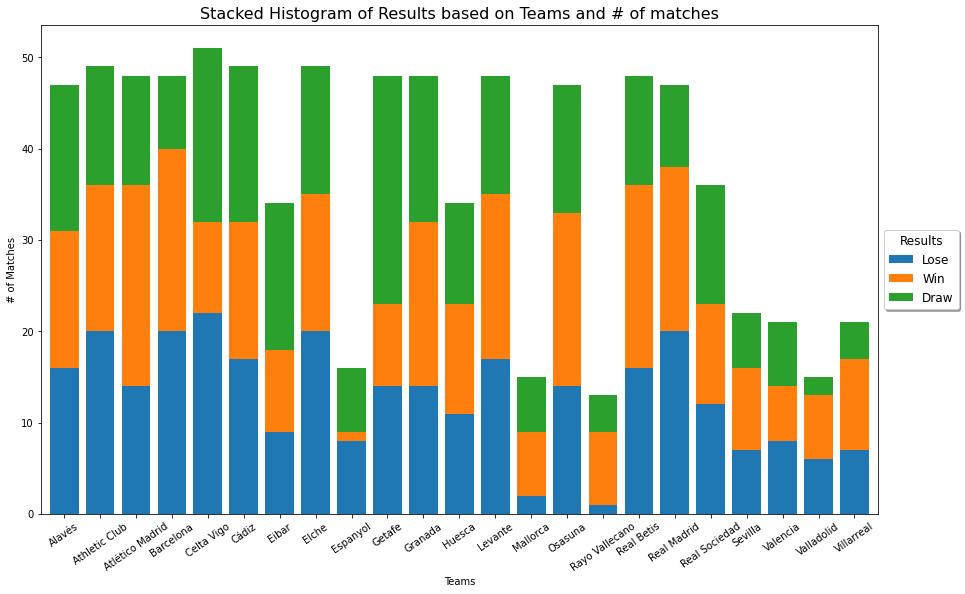

In [87]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


Data Processing : 

In [88]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

In [89]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [90]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)

df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                1080 non-null   object 
 1   Date                 1080 non-null   object 
 2   Team                 1080 non-null   object 
 3   Stadium              1080 non-null   object 
 4   Crowd                1080 non-null   object 
 5   Gls                  1080 non-null   int64  
 6   Ast                  1080 non-null   int64  
 7   PK                   1080 non-null   int64  
 8   PKatt                1080 non-null   int64  
 9   Sh                   1080 non-null   int64  
 10  SoT                  1080 non-null   int64  
 11  CrdY                 1080 non-null   int64  
 12  CrdR                 1080 non-null   int64  
 13  Touches              1080 non-null   float64
 14  Press                1080 non-null   float64
 15  Tkl                  1080 non-null   f

In [91]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks"])
df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                1080 non-null   object 
 1   Date                 1080 non-null   object 
 2   Team                 1080 non-null   object 
 3   Stadium              1080 non-null   object 
 4   Crowd                1080 non-null   object 
 5   Results              854 non-null    float64
 6   Home/Away            1080 non-null   int64  
 7   last_3_avrg_Gls      1057 non-null   float64
 8   avrg_Gls             1057 non-null   float64
 9   last_3_avrg_Ast      1057 non-null   float64
 10  avrg_Ast             1057 non-null   float64
 11  last_3_avrg_PK       1057 non-null   float64
 12  avrg_PK              1057 non-null   float64
 13  last_3_avrg_PKatt    1057 non-null   float64
 14  avrg_PKatt           1057 non-null   float64
 15  last_3_avrg_Sh       1057 non-null   f

In [92]:
'''
# to correct

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_(drop=True)
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Home/Away','Stadium','Crowd'])

differences = {}
for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    difference = []
    for avg_feature in features_average.columns:
        difference.append(oi[avg_feature][0]-oi[avg_feature][1])
    differences[avg_feature]= difference

for avg_feature, difference in differences.items():
    difference = pd.DataFrame(difference)
    df_versus[avg_feature] = difference

df_versus
'''

'\n# to correct\n\nmatches = pd.DataFrame(df_versus.Match.drop_duplicates())\nmatches = matches.reset_(drop=True)\nfeatures_average = df_versus.drop(columns=[\'Match\',\'Date\',\'Results\',\'Team\',\'Home/Away\',\'Stadium\',\'Crowd\'])\n\ndifferences = {}\nfor i in matches.Match:\n    i = str(i)\n    oi = df_versus.loc[df_versus["Match"]==i]\n    oi = oi.reset_index(drop=True)\n    difference = []\n    for avg_feature in features_average.columns:\n        difference.append(oi[avg_feature][0]-oi[avg_feature][1])\n    differences[avg_feature]= difference\n\nfor avg_feature, difference in differences.items():\n    difference = pd.DataFrame(difference)\n    df_versus[avg_feature] = difference\n\ndf_versus\n'

In [93]:
opponent_teams = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    b = a[1].replace("_"," ")
    a = a[0].replace("_"," ")
    if a == j:
        opponent_teams.append(b[1:]) 
    else : 
        opponent_teams.append(a)
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_teams))
df_versus.head(5)

,Match,Date,Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,...,avrg_Touches,last_3_avrg_Press,avrg_Press,last_3_avrg_Tkl,avrg_Tkl,last_3_avrg_Int,avrg_Int,last_3_avrg_Blocks,avrg_Blocks,Opponent_Team
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1,0.666667,0.500000,0.333333,...,478.250000,144.333333,156.000000,17.000000,19.250000,7.666667,6.000000,14.666667,15.250000,Athletic Club
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0,0.666667,0.666667,0.666667,...,600.666667,125.333333,125.333333,12.000000,12.000000,4.333333,4.333333,12.000000,12.000000,Alavés
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,1,1.666667,0.875000,1.000000,...,474.562500,182.666667,145.375000,16.000000,16.375000,8.000000,8.562500,19.666667,16.125000,Atlético Madrid
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,0,0.666667,1.857143,0.666667,...,677.357143,127.333333,130.214286,19.000000,17.357143,9.333333,9.357143,17.666667,16.142857,Alavés
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",2.0,1,1.000000,0.837209,1.000000,...,489.139535,197.333333,144.720930,14.666667,15.093023,7.333333,11.488372,17.000000,14.674419,Atlético Madrid


In [94]:
# index teams 
set_of_teams = set(df_versus["Team"])
team_index = {}
i=1
for team in set_of_teams : 
    team_index[team]=i
    i+=1
team_index

{'Espanyol': 1,
 'Alavés': 2,
 'Mallorca': 3,
 'Cádiz': 4,
 'Getafe': 5,
 'Real Betis': 6,
 'Sevilla': 7,
 'Granada': 8,
 'Valencia': 9,
 'Elche': 10,
 'Real Sociedad': 11,
 'Eibar': 12,
 'Athletic Club': 13,
 'Atlético Madrid': 14,
 'Osasuna': 15,
 'Celta Vigo': 16,
 'Huesca': 17,
 'Rayo Vallecano': 18,
 'Real Madrid': 19,
 'Levante': 20,
 'Valladolid': 21,
 'Barcelona': 22,
 'Villarreal': 23}

In [95]:
# update the database considering the indexes of teams : 
teams = df_versus["Team"]
opponent_teams = df_versus["Opponent_Team"]
team_indexes = []
opponent_team_indexes = []
for team in teams : 
    team_indexes.append(team_index[team])
for team in opponent_teams : 
    opponent_team_indexes.append(team_index[team])
df_versus["Team"] = pd.DataFrame(np.array(team_indexes))
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_team_indexes))

df_versus.head(5)

,Match,Date,Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,...,avrg_Touches,last_3_avrg_Press,avrg_Press,last_3_avrg_Tkl,avrg_Tkl,last_3_avrg_Int,avrg_Int,last_3_avrg_Blocks,avrg_Blocks,Opponent_Team
0,Alavés_vs_Athletic_Club,2020-10-04,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1,0.666667,0.500000,0.333333,...,478.250000,144.333333,156.000000,17.000000,19.250000,7.666667,6.000000,14.666667,15.250000,13
1,Alavés_vs_Athletic_Club,2020-10-04,13,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0,0.666667,0.666667,0.666667,...,600.666667,125.333333,125.333333,12.000000,12.000000,4.333333,4.333333,12.000000,12.000000,2
2,Alavés_vs_Atlético_Madrid,2021-01-03,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,1,1.666667,0.875000,1.000000,...,474.562500,182.666667,145.375000,16.000000,16.375000,8.000000,8.562500,19.666667,16.125000,14
3,Alavés_vs_Atlético_Madrid,2021-01-03,14,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,0,0.666667,1.857143,0.666667,...,677.357143,127.333333,130.214286,19.000000,17.357143,9.333333,9.357143,17.666667,16.142857,2
4,Alavés_vs_Atlético_Madrid,2021-09-25,2,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",2.0,1,1.000000,0.837209,1.000000,...,489.139535,197.333333,144.720930,14.666667,15.093023,7.333333,11.488372,17.000000,14.674419,14


In [129]:
# Get rid of Naan values and infinite values

df_versus.replace([np.inf, -np.inf], np.nan, inplace=True)
df_versus.dropna(how='any', inplace=True)



In [130]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils


X = df_versus.drop(columns=['Date','Match','Results','Stadium','Crowd'])

Y = df_versus['Results']

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

acc_random = []
acc_KNN = []
acc_logistic = []
acc_svm = []
for i in range(1000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("Random Forest : ", np.array(acc_random).mean())
print("KNN : ",np.array(acc_KNN).mean())
print("Logistic Regression : ",np.array(acc_logistic).mean())
print("SVM : ", np.array(acc_svm).mean())

Random Forest :  0.35052830188679246
KNN :  0.3018867924528302
Logistic Regression :  0.2964622641509434
SVM :  0.2552547169811321
